# Introduction

So far in this course, we've looked at ANOVAs for parametric test, analyses of variances, and all of these have fallen into the category of linear models, which we'll abbreviate as LM. 

And the ANVOAs that we've used are examples of linear models. 

But there's a generalization of linear models called: Generalized Linear Models. 

How do they generalize the linear model? Conceptually, what you can think of is that the linear model relates our factors or what are called predictor variables, the things we're manipulating in an experiment, it relates them to a response that's generally considered to be normal in nature. 

The generalized linear model goes beyond the relationship of predictors to our response being normal to allow for those other kinds of distributions that we looked at previously. I won't draw them all again but we'll remember the lognormal distribution and we'll remember things like the exponential distribution, the Poisson distribution, gamme distribution, bionomial or multinomial distributions that we talked about previously. 

When we generalize the model to these other distributions, we're able to analyze data that would otherwise perhaps violate the assumptions of ANOVA or not be suitable to just the regular linear model. 

So we're going to use GLMs to revisit some of the data that we analyzed previously in other ways. And we'll show that these generalized linear models are quite powerful and versatile. 

The generalized linear model can only handle between-subjects factors. So we'll be looking at just between-subjects situations for the generalized lienar model. And later in the course, we'll consider the generalized linear mixed model and the linear mixed model, which add the opportunity to do within-subjects analyses of experiments. For now, we'll be working with between-subjects with the generalized linear model. 

And we'll look at 3 examples. 

We'll look at our prefs ABC sex data, where we saw website preference respones from men and women in 3 categories (Website A, B, or C). Originally, we analyzed that with a chi-squared test. We analyzed it with a 2 sample chi-squared test. Next, we'll use something called multinomial logistic regression. And you'll recall the word multinomial is related to the multinomal distribution. It's when we have multiple categories of responses. 

We also will look again at our search, scroll, and voice data. And in particular, the effort ratings on the Likert scales. So we had a 1 to 7 effort score that people gave. 

You might recall that this was about using search, scroll, and voice on a smartphone to find contacts in a contacts manager. Now this was originally a within-subjects rating. We'll recode it to pretend it's a between-subjects variable and comply with the between-subjects requirement for generalized linear models. Previously, we analyzed this with a Friedman test. 

With a between-subjects approach to this, we'll analyze it with something called ordinal logistic regression. Ordinal because we have an ordinal response variable. It's related to multinomial logistic regression but for ordinal responses. And last, we're going to also look in search, scroll, and voice but at the error counts. The errors counts were the errors made while finding contacts in the contacts manager. We originally analyzed that also with a Friedman test. Here, we'll assume again they were between subjects and we'll use Posisson regression to analyze those counts. You might recall we did test early on, knowing this was coming, to see whether those counts were Poisson distributed. 

All of these, Poisson, ordinal, multinomial, are forms of generalized linear models. And we'll see the power of these models to analyze non-numeric responses in these cases, and non-normally distributed data, discrete data distributed in a Poisson model in this case.

# Analyzing 3 Generalized Linear Models (GLM)

Note that what we've done so far in the linear model actually is incorporated in a generalized linear model as well. It would be using the normal distribution as part of the generalized model. Generalized linear models also have, besides their distribution they're considering, something called the link function, and that's how the predictors or the factors relate to the mean of the response. Each distribution in a generalized linear model has a kind of canonical link function that goes with it and we'll always use the canonical one. But you can look into this further and see that you can actually have different link functions along with different distributions. 

Our first example is going to use what I previously called multinomial logistic regression. Sometimes, it's called nominal logistic regression. And that's because, we're analyzing nominal variables or categorical variables as a response. We did this in our previous data, prefsABCsex, where we saw the preferences of males and females for 3 different websites (A, B, C). So this will use the multinomal distribution with what's called the logit link function. 

Our question is: Did people's preference vary by their sex? Did males or females prefer different website designs?

In [784]:
# Generalized Linear Models (GLM) extend Linear Models (LM) for studies 
# with between-Ss factors to acommodate nominal (incl. binomial) or ordinal 
# responses, or with non-normal response distributions (e.g., Poisson, 
# exponential, gamma). All GLMs have a distribution and a link fn relating 
# their factors to their response. The GLM generalizes the LM, which is a 
# GLM with a normal distribution and "identity" link fn. See, e.g., 
# http://en.wikipedia.org/wiki/Generalized_linear_model

prefsABCsex.2 <- read.csv("materials/prefsABCsex.csv")
head(prefsABCsex.2)

Subject Pref Sex
1 1       C    F  
2 2       C    M  
3 3       B    M  
4 4       C    M  
5 5       C    M  
6 6       B    F

In [785]:
prefsABCsex.2$Subject <- as.factor(prefsABCsex.2$Subject)

In [786]:
summary(prefsABCsex.2)

    Subject   Pref   Sex   
 1      : 1   A: 8   F:29  
 2      : 1   B:21   M:31  
 3      : 1   C:31         
 4      : 1                
 5      : 1                
 6      : 1                
 (Other):54                

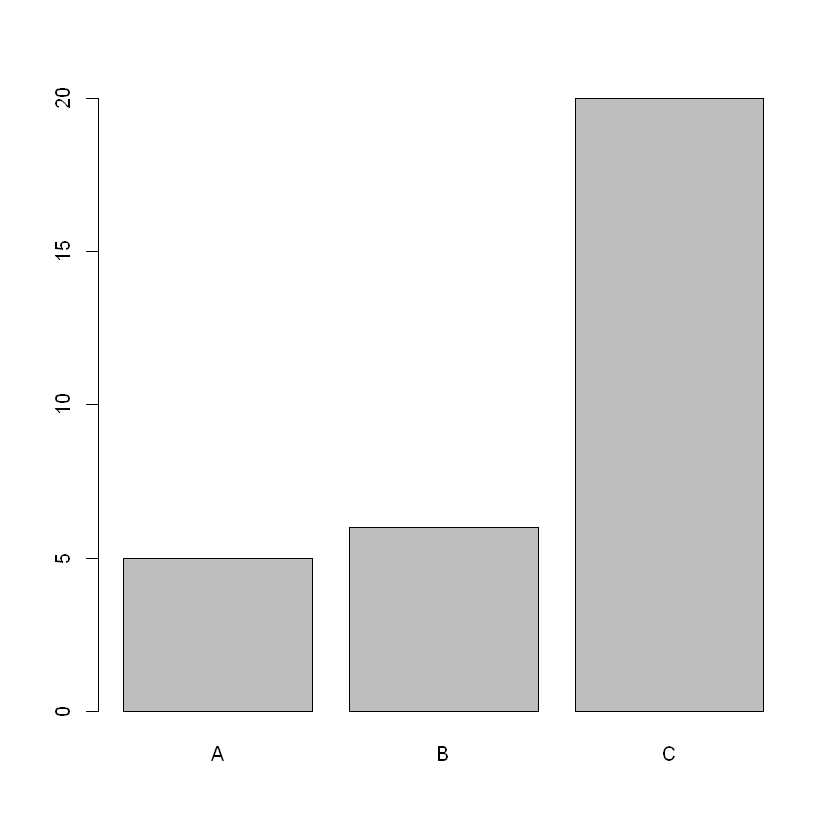

In [787]:
plot(prefsABCsex.2[prefsABCsex.2$Sex == "M",]$Pref)

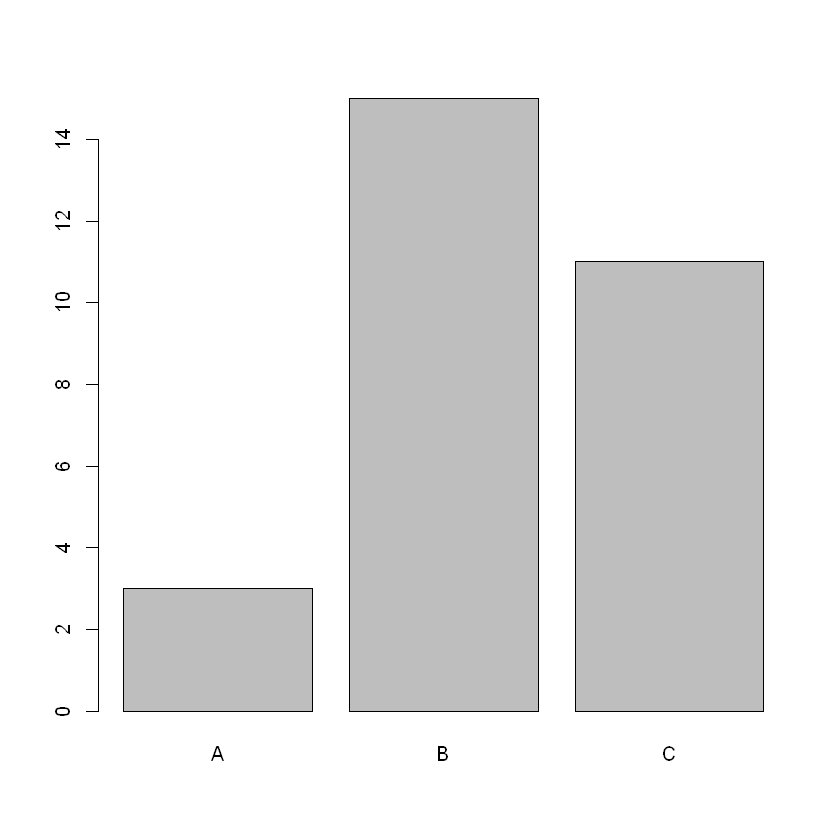

In [788]:
plot(prefsABCsex.2[prefsABCsex.2$Sex == "F",]$Pref)

In [789]:
head(prefsABCsex.2)

Subject Pref Sex
1 1       C    F  
2 2       C    M  
3 3       B    M  
4 4       C    M  
5 5       C    M  
6 6       B    F

In [790]:
## GLM 1: Nominal logistic regression for preference responses
## -----  Multinomial distribution w/ logit link fn

In [791]:
# analyze Pref by Sex with multinomial logistic regression,
# also sometimes called nominal logistic regression

library("nnet") # for multinom
library("car") # for anova

# set sum to zero contrasts for the anova call
contrasts(prefsABCsex.2$Sex) <- "contr.sum"

contrasts(prefsABCsex.2$Sex)

[,1]
F  1  
M -1

In [792]:
m <- multinom(Pref ~ Sex, data=prefsABCsex.2)
Anova(m, type=3) 

# note: if Pref had only 2 response categories, we might us 
# binomial regression, which uses the same syntax as poisson regression
# but with family=binomial

# weights:  9 (4 variable)
initial  value 65.916737 
iter  10 value 55.099353
iter  10 value 55.099353
final  value 55.099353 
converged


LR Chisq Df Pr(>Chisq)
Sex 7.074429 2  0.02909426

Here in our omnibus (overall) test, we see a significant p-value of less than 0.05. So that's saying that it does seem that sex did affect the preferences distribution that we have in our data and we've just seen that in our plots. We see differences between the sexes. 

Because we have a significan overall test, we can reach in and look a bit more at these levels individually. And we can do that by looking at how the proportion of responses was within each of the sexes. Did any of those responses deviate signficantly from what we would expect by chance? 

In [793]:
# recall our testing from before to see which preferences by males were
# significantly different from chance (answer: really liked C).

ma <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "M",]$Pref == "A"), 
                     nrow(prefsABCsex.2[prefsABCsex.2$Sex == "M",]), 
                     p=1/3)

mb <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "M",]$Pref == "B"), 
                     nrow(prefsABCsex.2[prefsABCsex.2$Sex == "M",]), 
                     p=1/3)

mc <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "M",]$Pref == "C"), 
                     nrow(prefsABCsex.2[prefsABCsex.2$Sex == "M",]), 
                     p=1/3)

p.adjust(c(ma$p.value, mb$p.value, mc$p.value), method="holm") # correct for multiple comparisons

[1] 0.109473564 0.126622172 0.001296754

For website C, we do have a significant result. There is preference for C for men

In [794]:
# and for females, their preferences differed significantly from 
# chance for a different choice (answer: really disliked A).

fa <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "F",]$Pref == "A"), 
        nrow(prefsABCsex.2[prefsABCsex.2$Sex == "F",]), 
        p=1/3)

fb <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "F",]$Pref == "B"), 
        nrow(prefsABCsex.2[prefsABCsex.2$Sex == "F",]), 
        p=1/3)

fc <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "F",]$Pref == "C"), 
        nrow(prefsABCsex.2[prefsABCsex.2$Sex == "F",]), 
        p=1/3)

p.adjust(c(fa$p.value, fb$p.value, fc$p.value), method="holm") # correct for multiple comparisons

[1] 0.02703274 0.09447821 0.69396951

For females, they really disliked website A as that p-value is significant. In short, men really liked website C whereas women really disliked website A. That's why gender has a significant effect on website preference. 


Let's now move on to our second generalized linear model where we have an ordinal response. We'll use ordinal logistic regression for Likert type response (1 to 7). This will actually use multinomial distribution with cumulative logit link function. 

In [795]:
## GLM 2: Ordinal logistic regression for Likert responses
## -----  Multinomial distribution w/ cumulative logit link fn

# re-read our data showing Effort Likert rating for finding contacts on a smartphone
srchscrlvce.2 <- read.csv("materials/srchscrlvce.csv")

head(srchscrlvce.2)

Subject Technique Order Time Errors Effort
1 1       Search    1      98  4      5     
2 1       Scroll    2     152  0      6     
3 2       Search    2      57  2      2     
4 2       Scroll    1     148  0      3     
5 3       Search    1      86  3      2     
6 3       Scroll    2     160  0      4

In [796]:
# recode as between-Ss study. we're using the data but faking it so every record is a different subject. 
srchscrlvce.2$Subject <- (1:nrow(srchscrlvce.2)) 

srchscrlvce.2$Subject <- as.factor(srchscrlvce.2$Subject)
srchscrlvce.2$Order <- NULL # drop this 

In [797]:
summary(srchscrlvce.2)

    Subject    Technique       Time           Errors         Effort    
 1      : 1   Scroll:20   Min.   : 49.0   Min.   :0.00   Min.   :1.00  
 2      : 1   Search:20   1st Qu.: 86.0   1st Qu.:1.00   1st Qu.:3.00  
 3      : 1   Voice :20   Median : 97.0   Median :2.00   Median :4.00  
 4      : 1               Mean   :106.2   Mean   :2.75   Mean   :4.15  
 5      : 1               3rd Qu.:128.0   3rd Qu.:4.00   3rd Qu.:5.00  
 6      : 1               Max.   :192.0   Max.   :9.00   Max.   :7.00  
 (Other):54                                                            

In [798]:
head(srchscrlvce.2)

Subject Technique Time Errors Effort
1 1       Search     98  4      5     
2 2       Scroll    152  0      6     
3 3       Search     57  2      2     
4 4       Scroll    148  0      3     
5 5       Search     86  3      2     
6 6       Scroll    160  0      4

In [799]:
# re-familiarize ourselves with the Effort Likert response

library("plyr")

ddply(srchscrlvce.2, ~ Technique, function(data) summary(data$Effort))

Technique Min. 1st Qu. Median Mean 3rd Qu. Max.
1 Scroll    1    3.00    4      4.40 6.00    7   
2 Search    1    3.00    4      3.60 4.25    5   
3 Voice     1    3.75    5      4.45 5.25    6

In [800]:
ddply(srchscrlvce.2, ~ Technique, summarise, Effort.mean=mean(Effort), Effort.sd=sd(Effort))

Technique Effort.mean Effort.sd
1 Scroll    4.40        1.698296 
2 Search    3.60        1.187656 
3 Voice     4.45        1.356272

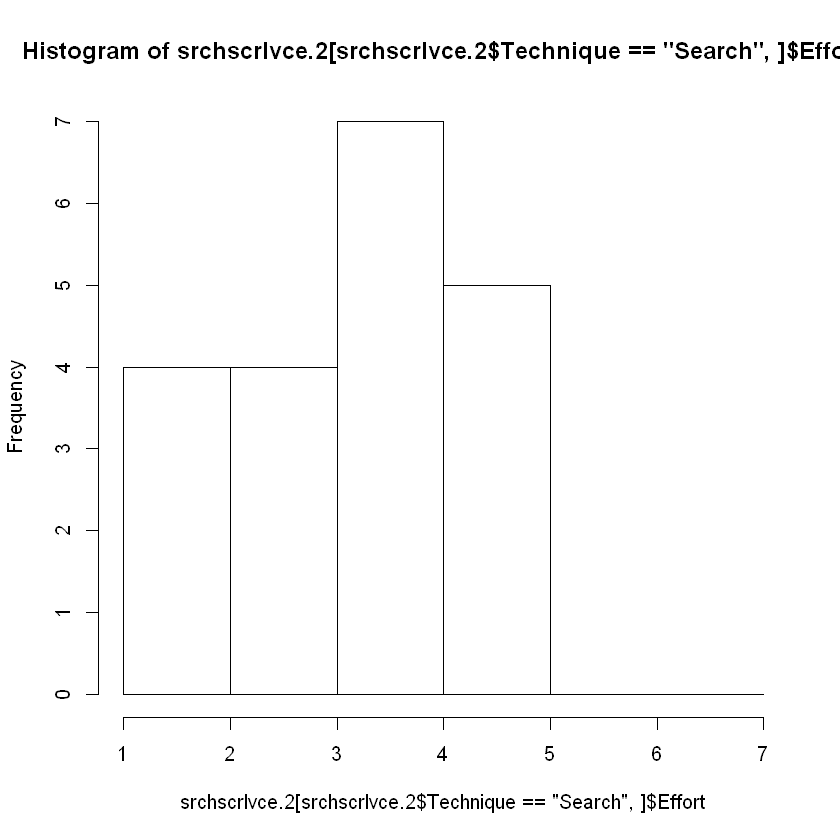

In [801]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Search",]$Effort, breaks=c(1:7), xlim=c(1,7))

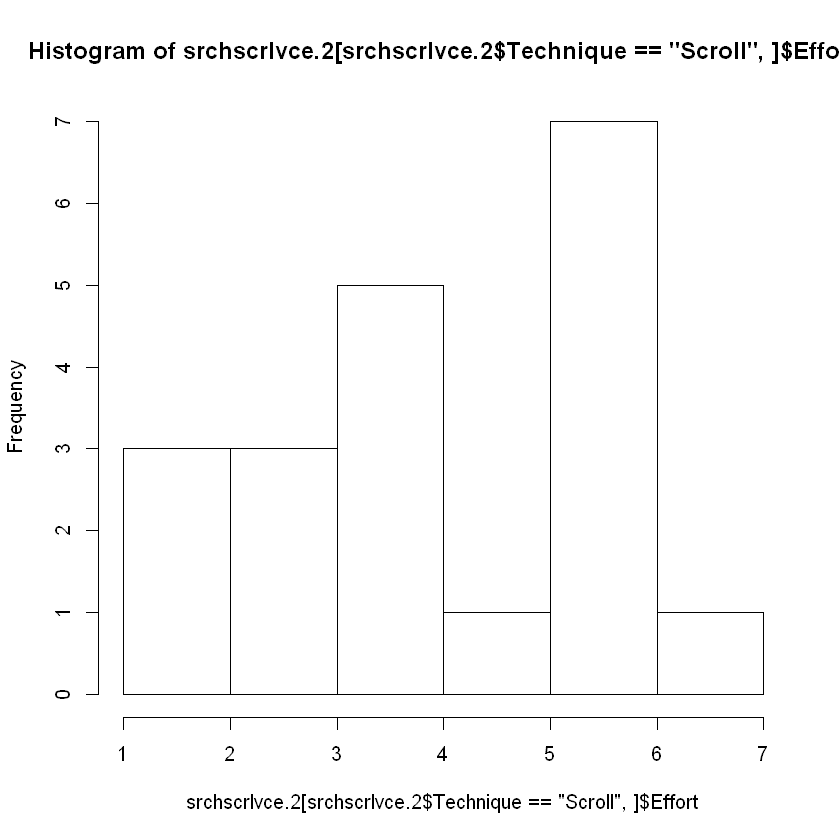

In [802]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Scroll",]$Effort, breaks=c(1:7), xlim=c(1,7))

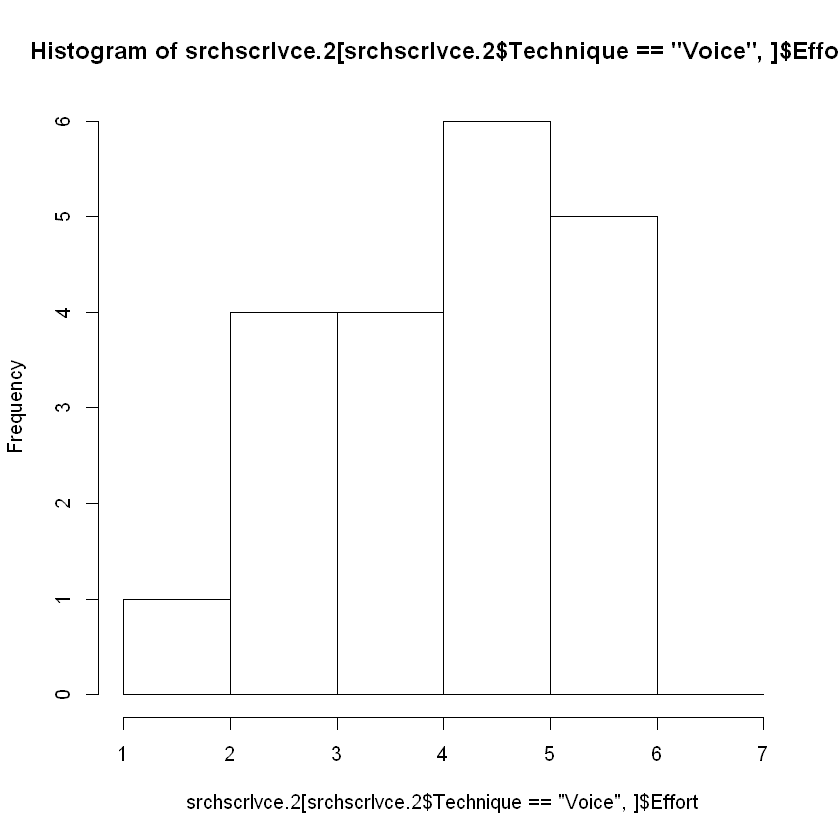

In [803]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Voice",]$Effort, breaks=c(1:7), xlim=c(1,7))

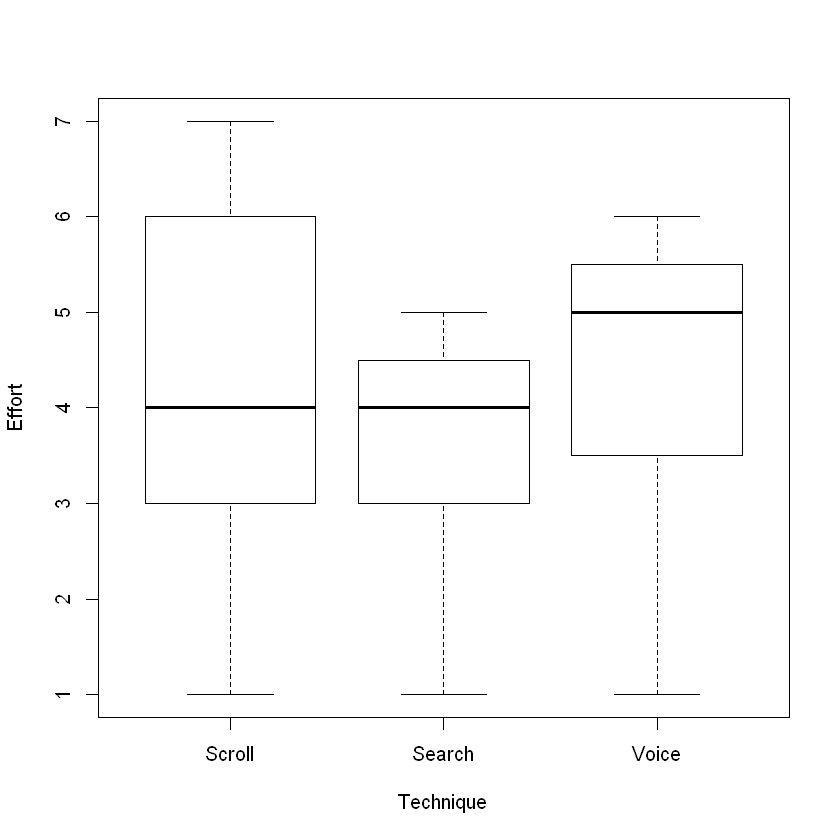

In [804]:
plot(Effort ~ Technique, data=srchscrlvce.2) # boxplot

In [805]:
# analyze Effort Likert ratings by Technique with ordinal logistic regression

library("MASS") # for polr
library("car") # for anova

srchscrlvce.2$Effort <- ordered(srchscrlvce.2$Effort) # must be an ordinal response

In [806]:
summary(srchscrlvce.2)

    Subject    Technique       Time           Errors     Effort
 1      : 1   Scroll:20   Min.   : 49.0   Min.   :0.00   1: 3  
 2      : 1   Search:20   1st Qu.: 86.0   1st Qu.:1.00   2: 5  
 3      : 1   Voice :20   Median : 97.0   Median :2.00   3:11  
 4      : 1               Mean   :106.2   Mean   :2.75   4:16  
 5      : 1               3rd Qu.:128.0   3rd Qu.:4.00   5:12  
 6      : 1               Max.   :192.0   Max.   :9.00   6:12  
 (Other):54                                              7: 1  

In [807]:
contrasts(srchscrlvce.2$Technique)

Search Voice
Scroll 0      0    
Search 1      0    
Voice  0      1

In [808]:
# set sum-to-zero contrasts for the Anova call
contrasts(srchscrlvce.2$Technique) <- "contr.sum"

contrasts(srchscrlvce.2$Technique)

[,1] [,2]
Scroll  1    0  
Search  0    1  
Voice  -1   -1

In [809]:
head(srchscrlvce.2)

Subject Technique Time Errors Effort
1 1       Search     98  4      5     
2 2       Scroll    152  0      6     
3 3       Search     57  2      2     
4 4       Scroll    148  0      3     
5 5       Search     86  3      2     
6 6       Scroll    160  0      4

In [810]:
m <- polr(Effort ~ Technique, data=srchscrlvce.2, Hess=TRUE) # ordinal logistic
Anova(m, type=3) # n.s.

LR Chisq Df Pr(>Chisq)
Technique 4.524566 2  0.1041125

We see a non-significant result. We can say that the overall/omnibus test has not concluded that we've seen significant difference among these levels for this ordinal response. 

For completeness, here's what we would do if it was signficant:

In [811]:
# post hoc pairwise comparisons are NOT justified due to lack of sig.
# but here's how we would do them, just for completeness

library("multcomp")

summary(glht(m, mcp(Technique="Tukey")), test=adjusted(type="holm")) # Tukey means compare all pairs


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: polr(formula = Effort ~ Technique, data = srchscrlvce.2, Hess = TRUE)

Linear Hypotheses:
                      Estimate Std. Error z value Pr(>|z|)
Search - Scroll == 0 -1.016610   0.584614  -1.739    0.191
Voice - Scroll == 0   0.007397   0.587700   0.013    0.990
Voice - Search == 0   1.024007   0.552298   1.854    0.191
(Adjusted p values reported -- holm method)


In [812]:
library("lsmeans") # equivalent way using lsmeans, pairs, and as.glht

summary(as.glht(pairs(lsmeans(m,  ~ Technique))), test=adjusted(type="holm"))


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                      Estimate Std. Error z value Pr(>|z|)
Scroll - Search == 0  1.016610   0.584614   1.739    0.191
Scroll - Voice == 0  -0.007397   0.587700  -0.013    0.990
Search - Voice == 0  -1.024007   0.552298  -1.854    0.191
(Adjusted p values reported -- holm method)


Finally, let's look at our 3rd generalized linear model -- Poisson regression which happens for rare event data and count responses. That uses a poisson distribution with the log link function

In [813]:
## GLM 3: Poisson regression for count responses
## -----  Poisson distribution w/ log link fn

# our data also has an "Errors" response, count data
# re-familiarize ourselves with the Errors response
library("plyr")

ddply(srchscrlvce.2, ~ Technique, function(data) summary(data$Errors))

Technique Min. 1st Qu. Median Mean 3rd Qu. Max.
1 Scroll    0    0.00    0.5    0.70 1.00    2   
2 Search    1    2.00    2.5    2.50 3.00    4   
3 Voice     2    3.75    5.0    5.05 6.25    9

In [814]:
ddply(srchscrlvce.2, ~ Technique, summarise, Errors.mean=mean(Errors), Errors.sd=sd(Errors))

Technique Errors.mean Errors.sd
1 Scroll    0.70        0.8013147
2 Search    2.50        1.0513150
3 Voice     5.05        1.9049796

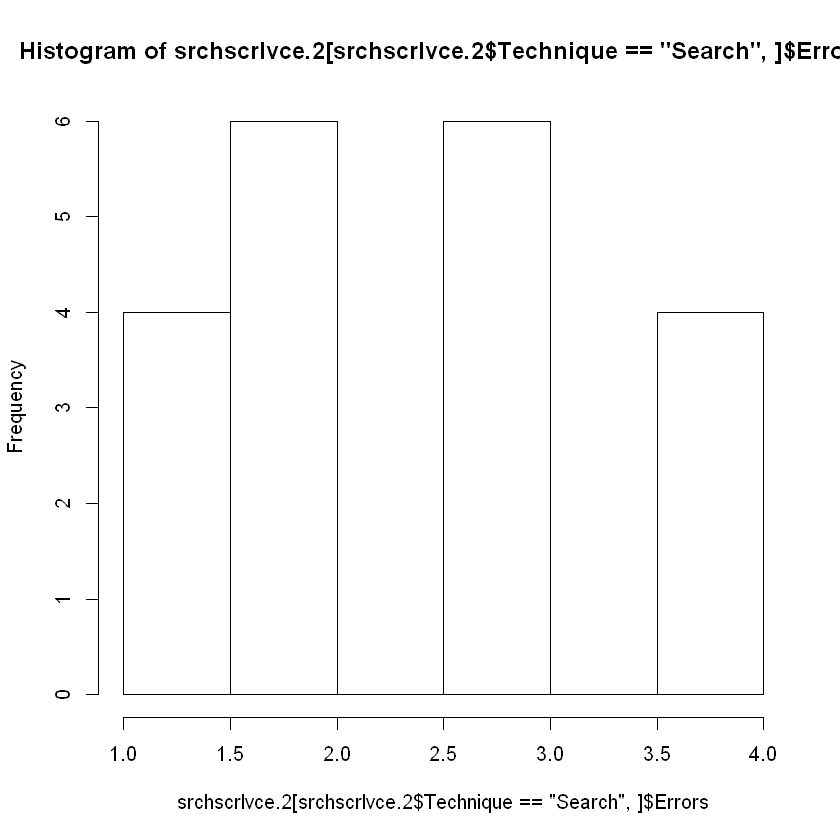

In [815]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Search",]$Errors)

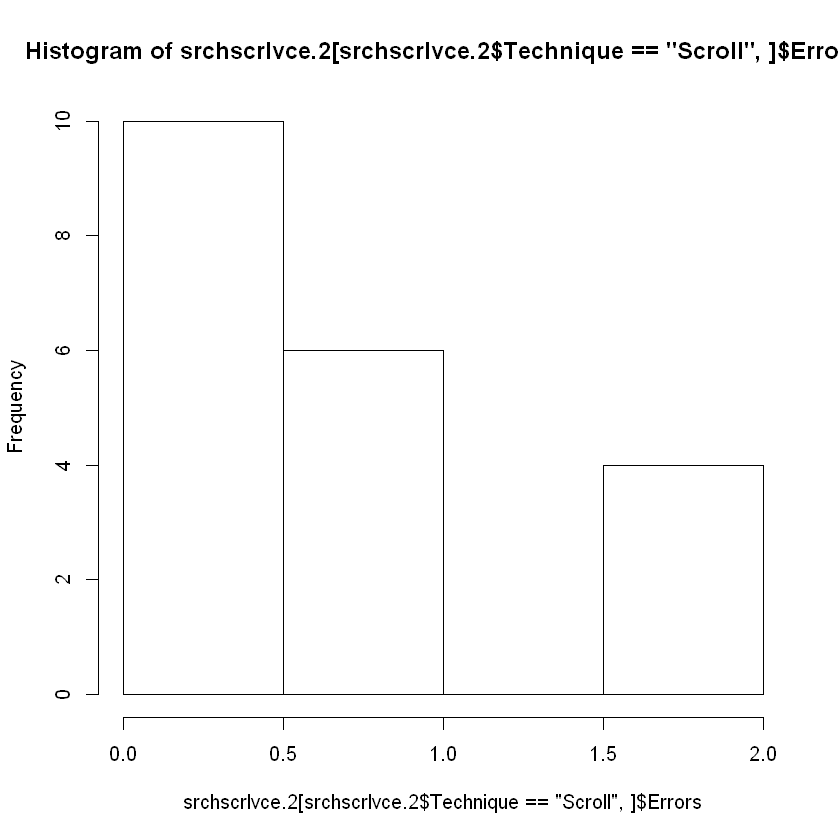

In [816]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Scroll",]$Errors)

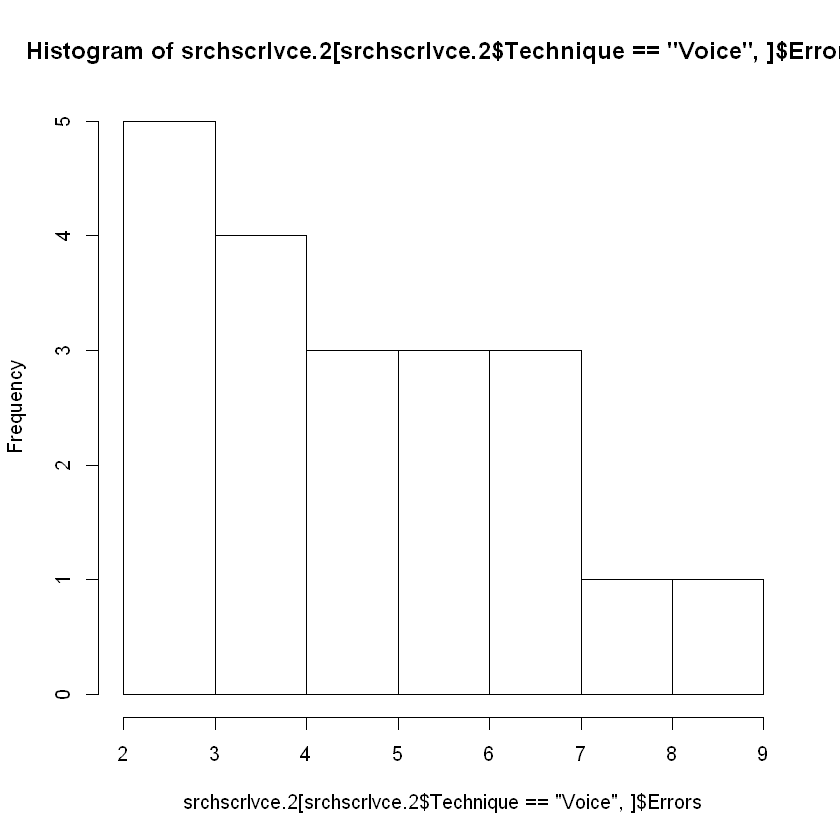

In [817]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Voice",]$Errors)

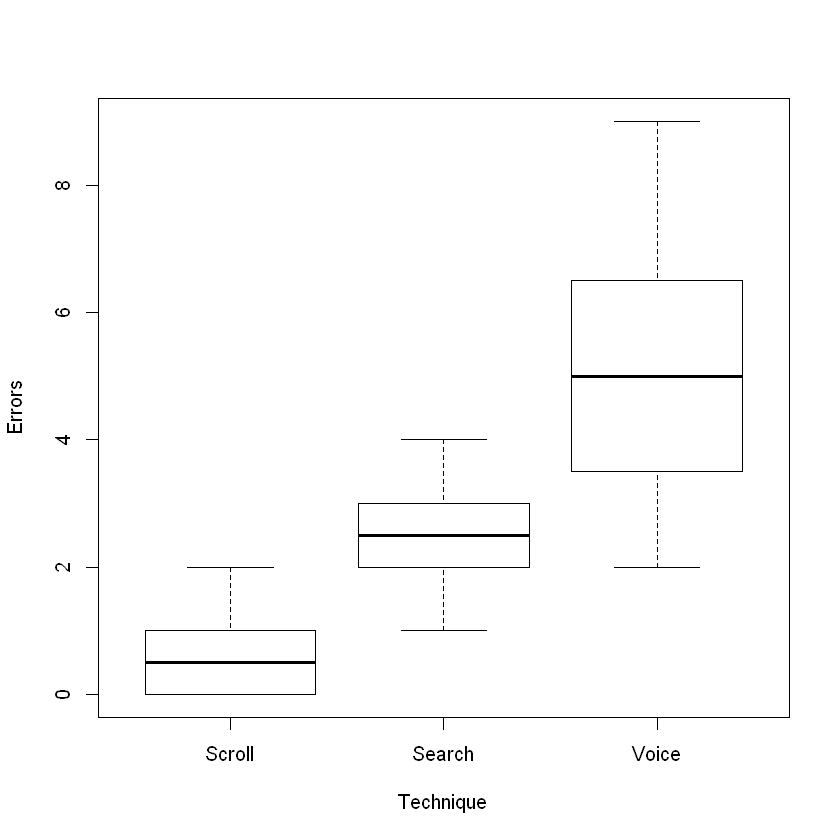

In [818]:
plot(Errors ~ Technique, data=srchscrlvce.2) # boxplot

We'll fit the poisson distribution to the search data and then do all goodness-of-fit test on that. This is going to tell us whether we differ significantly from the poisson distribution. 

In [819]:
# re-verify that these data are Poisson-distributed

library("fitdistrplus")

fit <- fitdist(srchscrlvce.2[srchscrlvce.2$Technique == "Search",]$Errors, "pois", discrete=TRUE)
gofstat(fit) # goodness-of-fit test

Chi-squared statistic:  1.522231 
Degree of freedom of the Chi-squared distribution:  2 
Chi-squared p-value:  0.4671449 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theocounts
<= 1  4.000000   5.745950
<= 2  6.000000   5.130312
<= 3  6.000000   4.275260
> 3   4.000000   4.848478

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   65.61424
Bayesian Information Criterion   66.60997

In [820]:
fit <- fitdist(srchscrlvce.2[srchscrlvce.2$Technique == "Scroll",]$Errors, "pois", discrete=TRUE)
gofstat(fit) # goodness-of-fit test

Chi-squared statistic:  0.3816087 
Degree of freedom of the Chi-squared distribution:  1 
Chi-squared p-value:  0.5367435 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theocounts
<= 0 10.000000   9.931706
<= 1  6.000000   6.952194
> 1   4.000000   3.116100

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   45.53208
Bayesian Information Criterion   46.52781

In [821]:
fit <- fitdist(srchscrlvce.2[srchscrlvce.2$Technique == "Voice",]$Errors, "pois", discrete=TRUE)
gofstat(fit) # goodness-of-fit test

Chi-squared statistic:  0.1611327 
Degree of freedom of the Chi-squared distribution:  3 
Chi-squared p-value:  0.9836055 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theocounts
<= 3  5.000000   5.161546
<= 4  4.000000   3.473739
<= 5  3.000000   3.508476
<= 6  3.000000   2.952967
> 6   5.000000   4.903272

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   84.19266
Bayesian Information Criterion   85.18839

For all of them, the p-value was not significant so there is no significant deviation from the poisson distribution. Now, let's move on to the actual Poisson regression GLM analysis. 

In [822]:
contrasts(srchscrlvce.2$Technique)

[,1] [,2]
Scroll  1    0  
Search  0    1  
Voice  -1   -1

In [823]:
# analyze using Poisson regression
# set sum-to-zero contrasts for the Anova call
contrasts(srchscrlvce.2$Technique) <- "contr.sum"

contrasts(srchscrlvce.2$Technique)

[,1] [,2]
Scroll  1    0  
Search  0    1  
Voice  -1   -1

In [824]:
# family parameter identifies both distribution and link fn
m <- glm(Errors ~ Technique, data=srchscrlvce.2, family=poisson)
Anova(m, type=3)

LR Chisq Df Pr(>Chisq)  
Technique 74.9303  2  5.359105e-17

We see that there is a significant p-value which means there is a difference. 

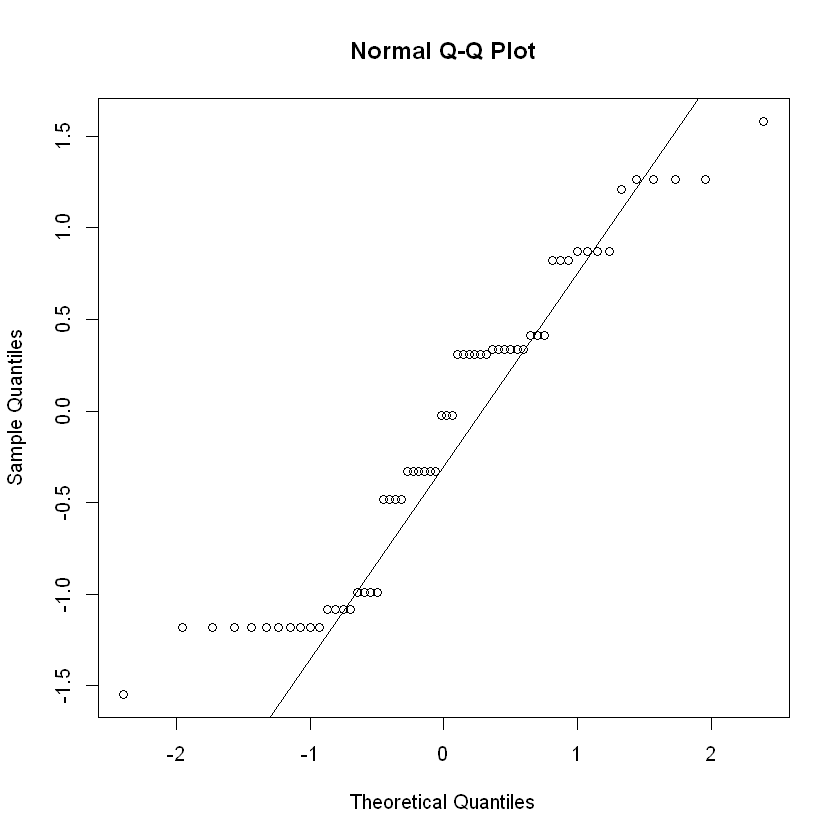

In [825]:
qqnorm(residuals(m)); qqline(residuals(m)) # it's ok! Poisson regression makes no normality assumption

Because we had a significant overall test, let's go and conduct a pairwise comparisons among the different levels of the technique factor. 

In [826]:
# conduct pairwise comparisons among levels of Technique
library("multcomp")

summary(glht(m, mcp(Technique="Tukey")), test=adjusted(type="holm")) # Tukey means compare all pairs


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glm(formula = Errors ~ Technique, family = poisson, data = srchscrlvce.2)

Linear Hypotheses:
                     Estimate Std. Error z value Pr(>|z|)    
Search - Scroll == 0   1.2730     0.3024   4.210 5.11e-05 ***
Voice - Scroll == 0    1.9761     0.2852   6.929 1.27e-11 ***
Voice - Search == 0    0.7031     0.1729   4.066 5.11e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- holm method)


From the results, none of these look like they are similar to the other. So we expect 3 significant pairwise differences. 

Technically, generalized linear models (GLM) are not non-parametric...at least not in the sense that they use ranks like the other non-parametric tests we've seen before. But I've put generalized linear models in the same category as ART because we would go to a GLM when we have a between subject study and we have data that wouldn't normally conform to our usual parametric linear model ANOVAs. 

# Quiz

Download the file deviceprefssex.csv from the course materials. This file describes the same study as in our deviceprefs.csv file, but now augmented with a column for Sex (M, F). It also still contains a column for Disability (1, 0). The research question is how preference for either touchpads or trackballs differs by disability status and sex. How many subjects took part in this study?

In [827]:
df <- read.csv("materials/deviceprefssex.csv")

In [828]:
head(df)

Subject Disability Sex Pref     
1 1       1          M   trackball
2 2       1          F   touchpad 
3 3       0          M   touchpad 
4 4       0          F   trackball
5 5       1          M   touchpad 
6 6       0          F   touchpad

In [829]:
df$Subject <- as.factor(df$Subject)
df$Disability <- as.factor(df$Disability)

In [830]:
summary(df)

    Subject   Disability Sex           Pref   
 1      : 1   0:18       F:15   touchpad :21  
 2      : 1   1:12       M:15   trackball: 9  
 3      : 1                                   
 4      : 1                                   
 5      : 1                                   
 6      : 1                                   
 (Other):24                                   

In [831]:
tail(df$Subject)

[1] 25 26 27 28 29 30
30 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 30

Use binomial regression to examine Pref by Disability and Sex. To the nearest ten-thousandth (four digits), what is the p-value of the Disability × Sex interaction? Hint: Create a model with glm using family=binomial. Then use the car library and its Anova function with type=3. Prior to either, set sum-to-zero contrasts for both Disability and Sex.

In [832]:
contrasts(df$Disability)

1
0 0
1 1

In [833]:
contrasts(df$Disability) <- "contr.sum"

contrasts(df$Disability)

[,1]
0  1  
1 -1

In [834]:
contrasts(df$Sex)

M
F 0
M 1

In [835]:
contrasts(df$Sex) <- "contr.sum"

contrasts(df$Sex)

[,1]
F  1  
M -1

In [836]:
m <- glm(Pref ~ Disability * Sex, data=df, family=binomial)
Anova(m, type=3)

LR Chisq   Df Pr(>Chisq) 
Disability     10.4436968 1  0.001230687
Sex             2.8269455 1  0.092694507
Disability:Sex  0.6963972 1  0.403996942

Multinomial regression generalizes binomial regression to dependent variables with more than two categories, so it can handle just two categories as well. Use multinomial regression to examine Pref by Disability and Sex. To the nearest ten-thousandth (four digits), what is the p-value of the Disability × Sex interaction? Hint: Use the nnet library and its multinom function. Then use the car library and its Anova function with type=3. Prior to either, set sum-to-zero contrasts for both Disability and Sex.

In [837]:
m <- multinom(Pref ~ Disability * Sex, data=df)
Anova(m, type=3)

# weights:  5 (4 variable)
initial  value 20.794415 
iter  10 value 13.023239
iter  20 value 13.010200
final  value 13.010184 
converged


LR Chisq   Df Pr(>Chisq) 
Disability     10.4434302 1  0.001230865
Sex             2.8266790 1  0.092709895
Disability:Sex  0.6961306 1  0.404086917

Let us examine whether there was a significant preference for touchpads or trackballs within each Disability × Sex combination. Conduct such an exploration using post hoc binomial tests. Adjust for multiple comparisons using Holm's sequential Bonferroni procedure. What is the lowest corrected p-value produced by such an exploration? Hint: Conduct four separate tests with binom.test. The four tests correspond to the four combinations of Disability and Sex. For each combination, test the sum of rows preferring "touchpad" against all rows having that same Disability * Sex combination. Since there are only two devices, a test for touchpad is implicitly a test for trackball, and vice versa.

In [838]:
head(df)

Subject Disability Sex Pref     
1 1       1          M   trackball
2 2       1          F   touchpad 
3 3       0          M   touchpad 
4 4       0          F   trackball
5 5       1          M   touchpad 
6 6       0          F   touchpad

In [839]:
# Sex = M/F
# Disability = 0/1
# Pref = trackball/touchpad

# First, for women without a disability, test the sum of rows in which they prefer the touchpad to all rows:
f0 <- binom.test(
        sum(df[df$Disability == "0" & df$Sex == "F",]$Pref == "touchpad"), 
        nrow(df[df$Disability == "0" & df$Sex == "F",]), 
        p=1/2)

# Second, do the same for men without a disability:
m0 <- binom.test(
        sum(df[df$Disability == "0" & df$Sex == "M",]$Pref == "touchpad"), 
        nrow(df[df$Disability == "0" & df$Sex == "M",]), 
        p=1/2)

# Third, do the same for women with a disability:
f1 <- binom.test(
        sum(df[df$Disability == "1" & df$Sex == "F",]$Pref == "touchpad"), 
        nrow(df[df$Disability == "1" & df$Sex == "F",]), 
        p=1/2)

# Fourth, do the same for men with a disability:
m1 <- binom.test(
        sum(df[df$Disability == "1" & df$Sex == "M",]$Pref == "touchpad"), 
        nrow(df[df$Disability == "1" & df$Sex == "M",]), 
        p=1/2)

# adjust for multiple comparisons:
p.adjust(c(f0$p.value, m0$p.value, f1$p.value, m1$p.value), method="holm")

[1] 0.1962891 0.0625000 1.0000000 1.0000000

Download the file hwreco.csv from the course materials. This file describes a study of three handwriting recognizers (A, B, C) and subjects who were either right-handed or left-handed. The response is the number of incorrectly recognized handwritten words out of every 100 handwritten words. The research questions are how each recognizer fared overall and whether a given recognizer performed better for right-handed or left-handed writers. How many subjects took part in this study?

In [840]:
df <- read.csv("materials/hwreco.csv")
head(df)

Subject Recognizer Hand  Errors
1 1       A          Right 9     
2 2       B          Left  8     
3 3       C          Right 2     
4 4       A          Left  3     
5 5       B          Right 3     
6 6       C          Left  3

In [841]:
df$Subject <- as.factor(df$Subject)

summary(df)

    Subject   Recognizer    Hand        Errors     
 1      : 1   A:17       Left :25   Min.   : 1.00  
 2      : 1   B:17       Right:25   1st Qu.: 3.00  
 3      : 1   C:16                  Median : 4.00  
 4      : 1                         Mean   : 4.38  
 5      : 1                         3rd Qu.: 6.00  
 6      : 1                         Max.   :11.00  
 (Other):44                                        

In [842]:
tail(df)

Subject Recognizer Hand  Errors
45 45      C          Right 2     
46 46      A          Left  3     
47 47      B          Right 1     
48 48      C          Left  4     
49 49      A          Right 4     
50 50      B          Left  4

Create an interaction plot with Recognizer on the X-axis and Hand as the traces. How many times, if any, do the two traces cross?

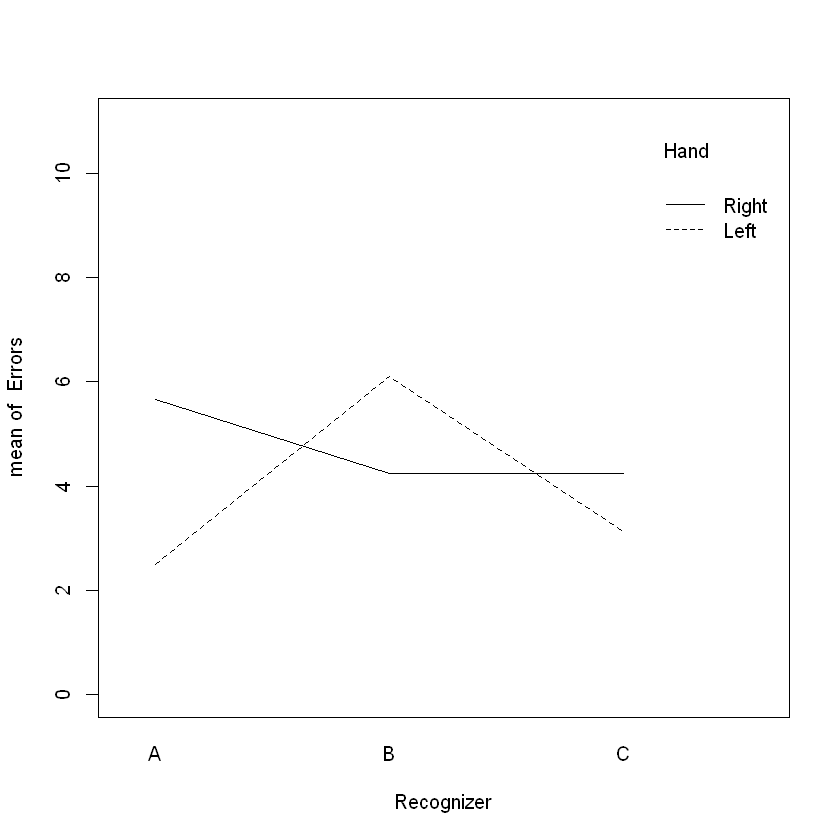

In [843]:
with(df, interaction.plot(Recognizer, Hand, Errors, ylim=c(0, max(df$Errors))))

Fit Poisson distributions to the Errors of each of the three Recognizer levels and test those fits with goodness-of-fit tests. To the nearest ten-thousandth (four digits), what is the lowest p-value produced by these tests? Hint: To fit a Poisson distribution, use the fitdistrplus library and its fitdist function. Then test the fit with the gofstat function.

In [844]:
a <- df[df$Recognizer=="A", ]
b <- df[df$Recognizer=="B", ]
c <- df[df$Recognizer=="C", ]

In [845]:
fit_a <- fitdist(a$Errors, "pois", discrete=TRUE)
gofstat(fit_a)

Chi-squared statistic:  1.807852 
Degree of freedom of the Chi-squared distribution:  2 
Chi-squared p-value:  0.4049767 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theocounts
<= 2  4.000000   3.627277
<= 3  5.000000   3.168895
<= 5  4.000000   6.072436
> 5   4.000000   4.131392

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   75.86792
Bayesian Information Criterion   76.70113

In [846]:
fit_b <- fitdist(b$Errors, "pois", discrete=TRUE)
gofstat(fit_b)

Chi-squared statistic:  0.9192556 
Degree of freedom of the Chi-squared distribution:  2 
Chi-squared p-value:  0.6315187 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theocounts
<= 3  5.000000   3.970124
<= 5  4.000000   5.800601
<= 6  3.000000   2.588830
> 6   5.000000   4.640445

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   78.75600
Bayesian Information Criterion   79.58921

In [847]:
fit_c <- fitdist(c$Errors, "pois", discrete=TRUE)
gofstat(fit_c)

Chi-squared statistic:  0.3521272 
Degree of freedom of the Chi-squared distribution:  2 
Chi-squared p-value:  0.8385647 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theocounts
<= 2  5.000000   4.600874
<= 3  4.000000   3.347372
<= 4  3.000000   3.085858
> 4   4.000000   4.965897

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   70.89042
Bayesian Information Criterion   71.66301

Use Poisson regression to examine Errors by Recognizer and Hand. To the nearest ten-thousandth (four digits), what is the p-value of the Recognizer × Hand interaction? Hint: Create a model with glm using family=poisson. Then use the car library and its Anova function with type=3. Prior to either, set sum-to-zero contrasts for both Recognizer and Hand.

In [848]:
contrasts(df$Recognizer) <- "contr.sum"
contrasts(df$Hand) <- "contr.sum"

In [849]:
m <- glm(Errors ~ Recognizer * Hand, data=df, family=poisson)
Anova(m, type=3)

LR Chisq  Df Pr(>Chisq)
Recognizer       4.876825 2  0.08729931
Hand             3.159116 1  0.07550405
Recognizer:Hand 12.968154 2  0.00152757

Conduct three planned comparisons between left- and right-handed recognition errors within each recognizer. Adjust for multiple comparisons using Holm's sequential Bonferroni procedure. What is the lowest corrected p-value from such tests? Hint: Use the multcomp and lsmeans libraries and the lsm formulation of the glht function. Because we only have three planned pairwise comparisons, use "none" for the initial multiple comparisons adjustment to avoid correcting for all possible pairwise comparisons. Instead, just find the three planned and as-yet uncorrected p-values and then pass them manually to p.adjust with method="holm".

In [850]:
# run all pairwise comparisons but do not correct for multiple comparisons 
# at this time, as only three planned comparisons will be regarded:
# assuming m = glm(Errors ~ Recognizer * Hand, data=df, family=poisson)

summary(glht(m, lsm(pairwise ~ Recognizer * Hand)), test=adjusted(type="none"))


	 Simultaneous Tests for General Linear Hypotheses

Fit: glm(formula = Errors ~ Recognizer * Hand, family = poisson, data = df)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
A,Left - B,Left == 0   -8.938e-01  2.611e-01  -3.423 0.000619 ***
A,Left - C,Left == 0   -2.231e-01  3.000e-01  -0.744 0.456990    
A,Left - A,Right == 0  -8.183e-01  2.638e-01  -3.102 0.001925 ** 
A,Left - B,Right == 0  -5.306e-01  2.818e-01  -1.883 0.059702 .  
A,Left - C,Right == 0  -5.306e-01  2.818e-01  -1.883 0.059702 .  
B,Left - C,Left == 0    6.707e-01  2.412e-01   2.780 0.005428 ** 
B,Left - A,Right == 0   7.551e-02  1.944e-01   0.388 0.697704    
B,Left - B,Right == 0   3.632e-01  2.182e-01   1.665 0.095955 .  
B,Left - C,Right == 0   3.632e-01  2.182e-01   1.665 0.095955 .  
C,Left - A,Right == 0  -5.952e-01  2.441e-01  -2.438 0.014779 *  
C,Left - B,Right == 0  -3.075e-01  2.635e-01  -1.167 0.243171    
C,Left - C,Right == 0  -3.075e-01  2.635e-01  -1.167 0.2431

In [851]:
# manually copy the three uncorrected p-values from 
# A,Left vs. A,Right; B,Left vs. B,Right; and C,Left vs. C,Right into p.adjust:

p.adjust(c(0.001925, 0.095955, 0.243171), method="holm")

[1] 0.005775 0.191910 0.243171

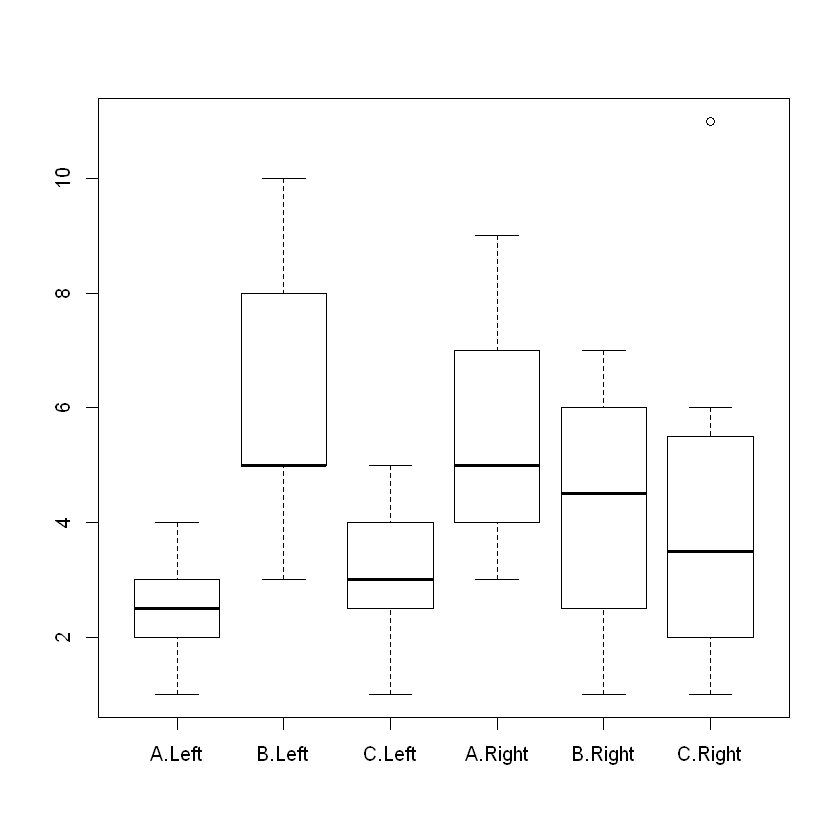

In [852]:
boxplot(Errors ~ Recognizer * Hand, data=df)

Download the file bookflights.csv from the course materials. This file describes a survey in which website visitors booked a flight on either Expedia, Orbitz, or Priceline. Whether they booked a domestic or international flight was recorded. The survey response was a 1-7 ordinal rating for Ease on a Likert-type scale, with "7" being easiest. The research question is which site felt easiest to use overall, and specifically for domestic vs. international bookings. How many subjects took part in this study? Hint: As usual, you will need to encode Subject as a factor. You will also need to encode International as a factor, because it, too, is encoded in the data table as a number, but should not be treated as a numeric value. You also will need to encode Ease, because it is an ordinal response. But instead of the factor function that you used for encoding Subject and International, you will need the ordered function for encoding Ease as ordinal.

In [853]:
df <- read.csv("materials/bookflights.csv")
head(df)

Subject Website   International Ease
1 1       Expedia   1             4   
2 2       Orbitz    1             3   
3 3       Priceline 1             5   
4 4       Expedia   0             1   
5 5       Orbitz    0             7   
6 6       Priceline 0             2

In [854]:
tail(df)

Subject Website   International Ease
595 595     Expedia   1             6   
596 596     Orbitz    1             2   
597 597     Priceline 1             6   
598 598     Expedia   0             5   
599 599     Orbitz    0             2   
600 600     Priceline 0             2

In [855]:
df$Subject <- as.factor(df$Subject)
df$International <- as.factor(df$International)
df$Ease <- as.ordered(df$Ease)

In [856]:
summary(df)

    Subject         Website    International Ease   
 1      :  1   Expedia  :200   0:300         1: 87  
 2      :  1   Orbitz   :200   1:300         2: 58  
 3      :  1   Priceline:200                 3:108  
 4      :  1                                 4:107  
 5      :  1                                 5: 95  
 6      :  1                                 6: 71  
 (Other):594                                 7: 74  

Create an interaction plot with Website on the X-axis and International as the traces. How many times, if any, do the two traces cross? Hint: If you already recoded Ease as an ordinal response, you must use as.numeric when passing it to interaction.plot.

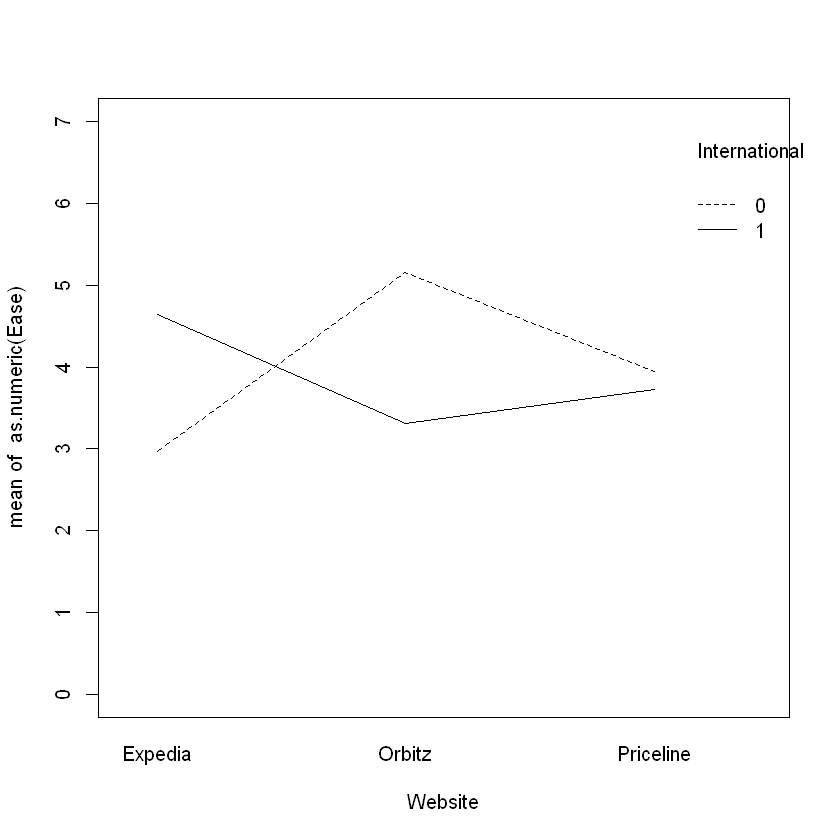

In [857]:
with(df, interaction.plot(Website, International, as.numeric(Ease), ylim=c(0, max(df$Ease))))

Use ordinal logistic regression to examine Ease by Website and International. To the nearest ten-thousandth (four digits), what is the p-value of the Website main effect? Hint: Use the MASS library and its polr function with Hess=TRUE to create the ordinal logistic model. Then use the car library and its Anova function with type=3. Prior to either, set sum-to-zero contrasts for both Website and International. And recall that Ease needs to have been encoded as an ordinal response with the ordered function.

In [858]:
contrasts(df$International) <- "contr.sum"
contrasts(df$Website) <- "contr.sum"

In [859]:
m <- polr(Ease ~ International * Website, data=df, Hess=TRUE)
Anova(m, type=3)

LR Chisq   Df Pr(>Chisq)  
International          0.6677662 1  4.138315e-01
Website                6.8108924 2  3.319201e-02
International:Website 90.5904892 2  2.130714e-20

Conduct three planned comparisons of Ease ratings between domestic and international bookings for each website. Adjust for multiple comparisons using Holm's sequential Bonferroni procedure. To the nearest ten-thousandth (four digits), what is the highest p-value from such tests? Hint: Use the multcomp and lsmeans libraries and the lsmeans, pairs, and as.glht functions. (The lsm formulation from within glht will not work in this case.) Because we only have three planned pairwise comparisons, use "none" for the multiple comparisons adjustment to avoid correcting for all possible pairwise comparisons. Instead, just find the three planned and as-yet uncorrected p-values and pass them manually to p.adjust with method="holm". Since the formulation for simultaneous comparisons is a bit different, we place the code for that aspect of this question here:

In [860]:
summary(as.glht(pairs(lsmeans(m,  ~ Website * International))), test=adjusted(type="none")) # this works!


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                               Estimate Std. Error z value Pr(>|z|)    
Expedia,0 - Orbitz,0 == 0       -2.1442     0.2619  -8.189 2.22e-16 ***
Expedia,0 - Priceline,0 == 0    -0.9351     0.2537  -3.686 0.000228 ***
Expedia,0 - Expedia,1 == 0      -1.6477     0.2570  -6.411 1.44e-10 ***
Expedia,0 - Orbitz,1 == 0       -0.3217     0.2490  -1.292 0.196380    
Expedia,0 - Priceline,1 == 0    -0.7563     0.2517  -3.004 0.002663 ** 
Orbitz,0 - Priceline,0 == 0      1.2091     0.2555   4.732 2.22e-06 ***
Orbitz,0 - Expedia,1 == 0        0.4965     0.2505   1.982 0.047498 *  
Orbitz,0 - Orbitz,1 == 0         1.8225     0.2571   7.089 1.35e-12 ***
Orbitz,0 - Priceline,1 == 0      1.3879     0.2546   5.452 4.99e-08 ***
Priceline,0 - Expedia,1 == 0    -0.7126     0.2518  -2.830 0.004659 ** 
Priceline,0 - Orbitz,1 == 0      0.6134     0.2497   2.457 0.014023 *  
Priceline,0 - Priceline,1 == 0   0.1789     0.2501   0.715 0.474

In [861]:
#  copy the three uncorrected p-values from 
# Expedia,0 vs. Expedia,1; Orbitz,0 vs. Orbitz,1; and Priceline,0 vs. Priceline,1 into p.adjust:

p.adjust(c(1.44e-10, 1.35e-12, 0.474476), method="holm")

[1] 2.88000e-10 4.05000e-12 4.74476e-01

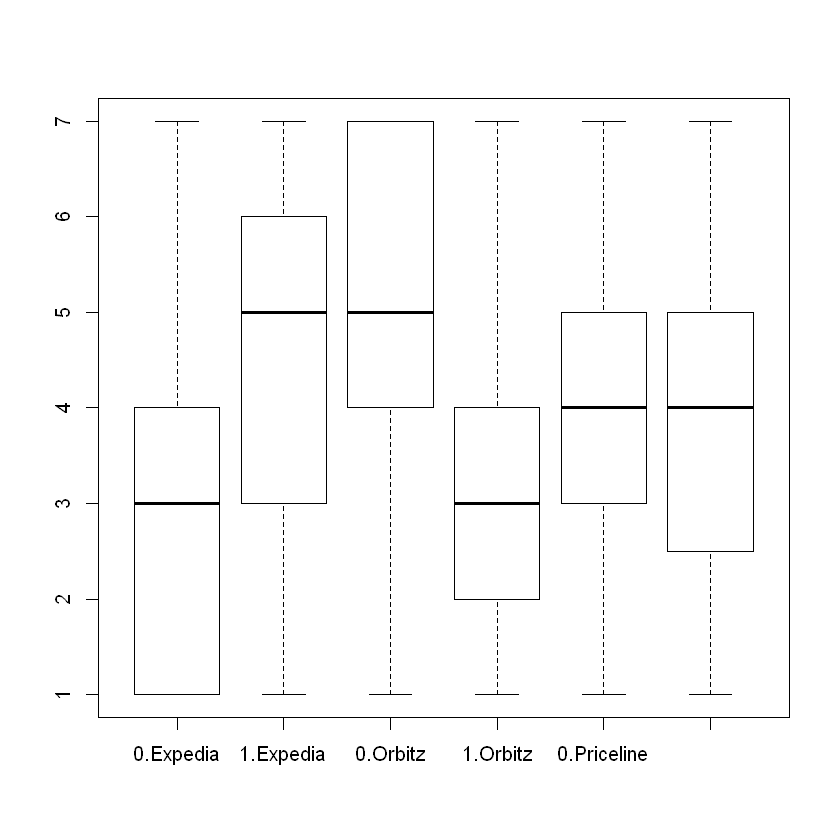

In [862]:
boxplot(Ease ~ International * Website, data=df)